In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv ('Datasheets/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
X=pd.get_dummies(data.drop('species',axis=1),drop_first=True)
y=data['species']
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
3,NaN,NaN,NaN,NaN,False,True,False,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,False,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model=RandomForestClassifier(n_estimators=10,random_state=59)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=59)

In [18]:
model.score(X,y)

0.9941860465116279

In [19]:
y_pred=model.predict(X_test)

In [23]:
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

<Axes: >

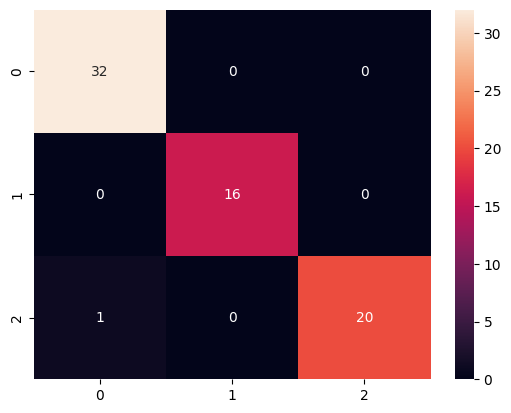

In [25]:
sns.heatmap(cm,annot=True)

In [30]:
error=[]

for i in range(1,40):
    model2=RandomForestClassifier(n_estimators= i)
    model2.fit(X_train,y_train)

    pred=model2.predict(X_test)
    error.append( 1- accuracy_score(y_test,pred))



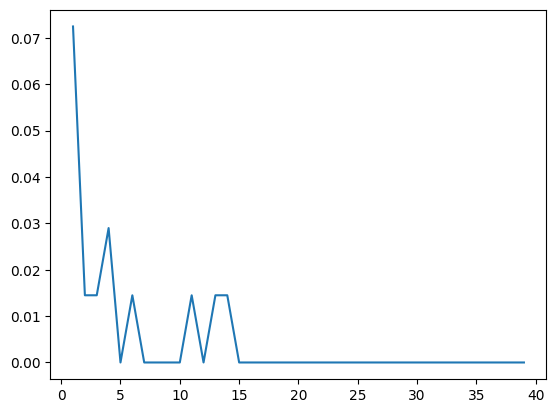

In [31]:
plt.plot(range(1,40),error)